<a href="https://colab.research.google.com/github/Mohammad-Mahdi1999/Multiplication-via-Neural-Network/blob/master/Multiplication_via_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Generate Dataset

In [2]:
x_1 = np.random.randint(0,10_000,1_000_000)
x_2 = np.random.randint(0,10_000,1_000_000)
y = x_1 * x_2 + 5

In [3]:
df = pd.DataFrame({
    "x_1" : x_1,
    "x_2" : x_2,
    "y" : y,

})

df

,x_1,x_2,y
0,415,445,184680
1,214,8226,1760369
2,9739,6547,63761238
3,9075,6558,59513855
4,690,3449,2379815
...,...,...,...
999995,5870,6643,38994415
999996,8553,9687,82852916
999997,6847,7763,53153266
999998,8148,388,3161429


## Data ???

In [11]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)
df_scaled

,x_1,x_2,y
0,-1.587357,-1.575320,-1.124090
1,-1.656982,1.119104,-1.052620
2,1.642389,0.537696,1.759619
3,1.412385,0.541505,1.566966
4,-1.492100,-0.535087,-1.024523
...,...,...,...
999995,0.302204,0.570939,0.636244
999996,1.231569,1.625023,2.625580
999997,0.640627,0.958775,1.278462
999998,1.091281,-1.595058,-0.989070


## Data Cleaning

In [12]:
print (f"There are {df_scaled.duplicated().sum()} duplicate records in dataset")

# Drop duplicates

df_scaled.drop_duplicates(inplace = True)
print("Dataset length after droping duplicatets: ", len(df_scaled))

There are 4928 duplicate records in dataset
Dataset length after droping duplicatets:  995072


## Data Splitting

In [13]:
X_train = df_scaled[["x_1","x_2"]][:800000]
Y_train = df_scaled[["y"]][:800000]
X_test = df_scaled[["x_1","x_2"]][800000:]
Y_test = df_scaled[["y"]][800000:]

print(f"Lenght of Train Data: {X_train.shape}")
print(f"Lenght of Test Data: {X_test.shape}")

Lenght of Train Data: (800000, 2)
Lenght of Test Data: (195072, 2)


## Modeling

In [14]:
from keras import layers
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau


## FFN : One Hidden Layer

In [15]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0044 - val_loss: 2.0412e-05 - lr: 0.0010
Epoch 2/100
   94/10000 [..............................] - ETA: 16s - loss: 2.0079e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 19s 2ms/step - loss: 1.3595e-05 - val_loss: 9.0292e-06 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 26s 3ms/step - loss: 9.3074e-06 - val_loss: 9.6235e-06 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 30s 3ms/step - loss: 8.7560e-06 - val_loss: 2.0727e-05 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 25s 3ms/step - loss: 8.1364e-06 - val_loss: 5.2009e-06 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 23s 2ms/step - loss: 7.6661e-06 - val_loss: 5.6307e-06 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 22s 2ms/step - loss: 7.4666e-06 - val_loss: 7.2059e-06 - lr: 0.0010
Epoch 8/100
 9980/10000 [============================>.] - ETA: 0s - loss: 7.0876e-06
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10000/10000 [==============================] - 20s 2ms/step - loss: 7.0852e-06 - val_lo

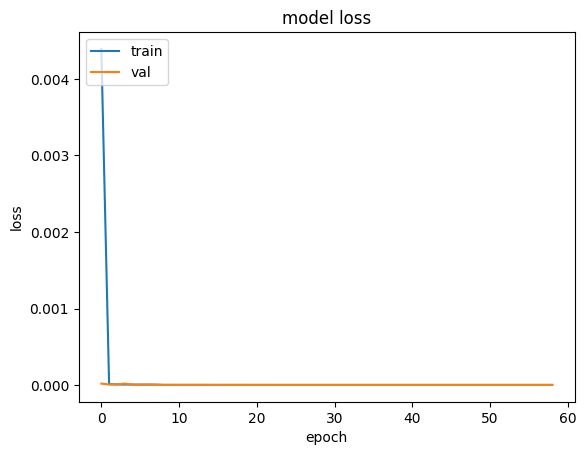

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

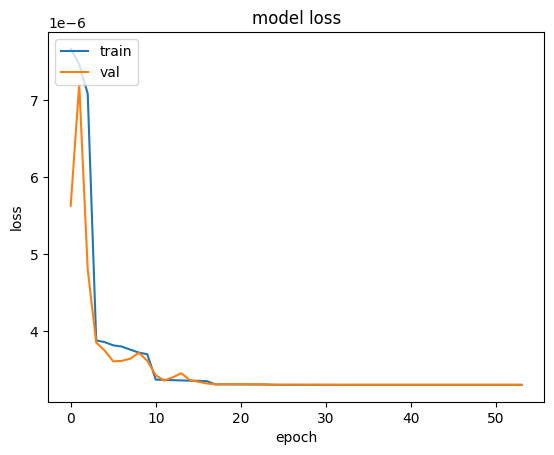

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

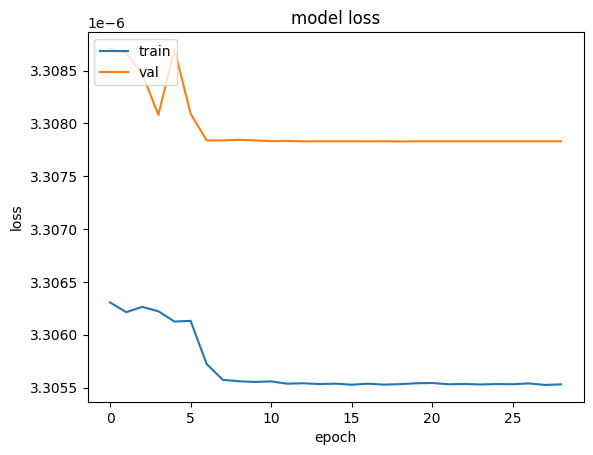

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

6093/6093 [==============================] - 13s 2ms/step - loss: 1.2708e-07


1.2707938878975256e-07

## Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(predicted)
output = scaler.inverse_transform([[np.nan,np.nan,predicted[:,0][0]]])
output

Data :


,x_1,x_2
803299,0.670967,0.126313


lable :


,y
803299,0.08476


1/1 [==============================] - 0s 97ms/step
[[0.08487717]]


array([[848.68682905,          nan,          nan]])

## Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[:,0][0]]])
print(f"Model Prediction is : {output}")

Data : [[0.80008001 0.30003           nan]]
Label : 24000005
1/1 [==============================] - 0s 109ms/step
[[0.24006832]]


array([[2400.44309628,           nan,           nan]])